# Predicting Blood Pressure Based on Diet
By: [Kelly Wu](https://www.linkedin.com/in/kelly-wu-nj/)

## Problem Statement

We have all gone to the doctor at least once in our life and went through the basic health checks: height, weight, temperature, and blood pressure. We're all familiar with the process of having our arm squeezed tightly by a cuff while a our doctor listens in with his or her stethoscope and watches the little monitor intently. Then we all hope to never hear that we have high blood pressure. High blood pressure, also known as a "silent killer," normally doesn't induce any health symptoms, but can lead to a heart attack or stroke. What's worse is that hypertension is so common that it is a leading risk for death and disability worldwide (Dr. Paul Whelton, an expert in hypertension and kidney disease at Tulane University). So what's something that could help us determine if we're at risk or not? 

Food is essential to life, but majority of the population simply eat what's good to them or what's convenient. There aren't many people who actually go through the trouble of calculating the necessary macronutrients needed on a daily basis. Culture also has another factor that affects diet where maybe certain foods like rice is the primary carbohydrate versus pasta in another culture. With such differences in diet and diet being a factor that affects blood pressure, can we predict blood pressure simply based on what we eat? Maybe our predictions will cause us to rethink what we eat or put more consideration into eating more variety. 

After our regression modeling, we can refer to our $R^2$ and Root Mean Squared Error (RMSE) scores to determine model accuracy. Once we can determine any relationships and correlations between diet and basic health knowledge such as height and weight and blood pressure. Our goal is to help nutritionists better assist their clients as well as allow the typical layman to determine their risk for high blood pressure without the hassle of going to a physician or spending money to purchase at at home blood pressure machine. 


## Executive Summary

We initially begin by gathering public data from The National Health and Nurtition Examination Survey (NHANES) from 2013 - 2014. Luckily, [Kaggle](https://www.kaggle.com/cdc/national-health-and-nutrition-examination-survey#diet.csv) organized the data for us into simple `.csv` files. After reading in our data, we intiated the cleaning process by isolating the columns of interest, handling null values, and creating a master data frame. Upon finalizing our master data frame, we had the following data with their corresponding units of measurement: 

|Water|Caffeine|Alcohol|Calcium|Carbs|Fiber|Protein|Potassium|Sodium|Sugar|Fat|Diastolic|Systolic|Height|Weight|
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
|mL|mg|g|mg|g|g|g|mg|mg|g|g|mm Hg|mm Hg|cm|kg|

Once we get our working data frame, we move onto our exploratory data analysis where we look for any standout values that may need an explanation. In order to determine whether certain values stand out or not, we researched what the recommended daily intakes of the dietary features are below. 

|Water|Caffeine|Alcohol|Calcium|Carbs|Cholesterol|Fiber|Protein|Potassium|Sodium|Sugar|Fat|
|---|---|---|---|---|---|---|---|---|---|---|---|
|2,000-2,500 mL|< 400 mg|< 42 g|1,000 mg|225-325 g|300 mg|25-30 g|0.8g * kg|3,500-4,700 mg|< 2.3k mg|25-37.5 g|44-77 g|

We noticed interesting relationships where solid substances played a lesser role than liquids from our exploratory data analysis alone. However, we also discovered other relationships based on each individual such as height and weight. Upon our visualizations, we realized that the relationship with diastolic pressure and systolic pressure is different where some relationships were similar, while a few showed almost mirrored relationships. 

Afterwards, we dived into the modeling component where we had to work with 6 variables since we needed to predict for systolic and diastolic pressure. This led us to run each type of model twice with the corresponding variables for what we wanted to analyze. Overall, we saw that the model always tended to perform better with systolic readings than diastolic readings. 

At the end of our findings, we realized that there could be a classification method in determining the class of someone's blood pressure and risk for hypertension. Unfortunately, given our data set we didn't have the minimum number of two classes to utilize the classification approach as all our individuals had normal blood pressures. 

## Contents: 
- [Imports](#Imports)
- [Outside Research](#Outside-Research)
- [Cleaning Our Data](#Cleaning-Our-Data)
    - [Creating a Master Data Frame](#Creating-a-Master-Data-Frame)
    - [Handling Null Values](#Handling-Null-Values)
    - [Feature Engineering](#Feature-Engineering)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
    - [Outlier Analysis](#Outlier-Analysis)
    - [Dropping Outliers](#Dropping-Outliers)
    - [Visualizations](#Visualizations)
        - [Histograms](#Histograms)
        - [Heat Maps](#Heat-Maps)
        - [Pair Plots](#Pair-Plots)
        - [Diastolic Scatter Plots](#Diastolic-Scatter-Plots)
        - [Systolic Scatter Plots](#Systolic-Scatter-Plots)
- [Preprocessing](#Preprocessing)
- [Regression Modeling](#Regression-Modeling)
    - [Linear Regressors](#Linear-Regressors)
        - [Diastolic Linear Regression](#Diastolic-Linear-Regression)
        - [Systolic Linear Regression](#Systolic-Linear-Regression)
        - [Diastolic Lasso Regression](#Diastolic-Lasso-Regression)
        - [Systolic Lasso Regression](#Systolic-Lasso-Regression)
        - [Diastolic Ridge Regression](#Diastolic-Ridge-Regression)
        - [Systolic Ridge Regression](#Systolic-Ridge-Regression)
        - [Diastolic Elastic Net Regression](#Diastolic-Elastic-Net-Regression)
        - [Systolic Elastic Net Regression](#Systolic-Elastic-Net-Regression)
    - [Tree Regressors](#Tree-Regressors)
        - [Diastolic Decision Tree](#Diastolic-Decision-Tree)
        - [Systolic Decision Tree](#Systolic-Decision-Tree)
        - [Diastolic Bagged Decision Tree](#Diastolic-Bagged-Decision-Tree)
        - [Systolic Bagged Decision Tree](#Systolic-Bagged-Decision-Tree)
        - [Diastolic Random Forest](#Diastolic-Random-Forest)
        - [Systolic Random Forest](#Systolic-Random-Forest)
    - [Boosters](#Boosters)
        - [Diastolic Adaptive Boost](#Diastolic-Adaptive-Boost)
        - [Systolic Adaptive Boost](#Systolic-Adaptive-Boost)
        - [Diastolic Gradient Boost](#Diastolic-Gradient-Boost)
        - [Systolic Gradient Boost](#Systolic-Gradient-Boost)
    - [GridSearch Voting Regressor](#GridSearch-Voting-Regressor)
        - [Diastolic Voting Regressor](#Diastolic-Voting-Regressor)
        - [Systolic Voting Regressor](#Systolic-Voting-Regressor)
- [Conclusion](#Conclusion)
- [Recommendations](#Recommendations)
    - [Classification Analysis](#Classification-Analysis)
- [Sources](#Sources)

## Imports
Import our necessary libraries and `csv` files that contain our datasets to help answer our problem statement. Our datasets contain responses from almost 10,000 individuals regarding various health and dietary questions. 

[Back to Contents](#Contents:)

In [1]:
# Importing libraries
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor, \
                             GradientBoostingRegressor, VotingRegressor



In [2]:
# Importing our datasets
diet_df = pd.read_csv('./datasets/diet.csv')
exam_df = pd.read_csv('./datasets/examination.csv')
demo_df = pd.read_csv('./datasets/demographic.csv')

In [3]:
# Preview our dietary data
diet_df.head()

,SEQN,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,...,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ,DRD370V
0,73557,16888.327864,12930.890649,1,49.0,2.0,2.0,6.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,73558,17932.143865,12684.148869,1,59.0,2.0,2.0,4.0,1.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
2,73559,59641.812930,39394.236709,1,49.0,2.0,2.0,18.0,6.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,73560,142203.069917,125966.366442,1,54.0,2.0,2.0,21.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73561,59052.357033,39004.892993,1,63.0,2.0,2.0,18.0,1.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0


In [4]:
# Preview our examinations data
exam_df.head()

,SEQN,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPAARM,BPACSZ,BPXPLS,BPXPULS,BPXPTY,...,CSXLEAOD,CSXSOAOD,CSXGRAOD,CSXONOD,CSXNGSOD,CSXSLTRT,CSXSLTRG,CSXNART,CSXNARG,CSAEFFRT
0,73557,1,620.0,NaN,NaN,1.0,4.0,86.0,1.0,1.0,...,2.0,1.0,1.0,1.0,4.0,62.0,1.0,NaN,NaN,1.0
1,73558,1,766.0,NaN,NaN,1.0,4.0,74.0,1.0,1.0,...,3.0,1.0,2.0,3.0,4.0,28.0,1.0,NaN,NaN,1.0
2,73559,1,665.0,NaN,NaN,1.0,4.0,68.0,1.0,1.0,...,2.0,1.0,2.0,3.0,4.0,49.0,1.0,NaN,NaN,3.0
3,73560,1,803.0,NaN,NaN,1.0,2.0,64.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73561,1,949.0,NaN,NaN,1.0,3.0,92.0,1.0,1.0,...,3.0,1.0,4.0,3.0,4.0,NaN,NaN,NaN,NaN,1.0


In [5]:
# Preview our examinations data
demo_df.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,73557,8,2,1,69,NaN,4,4,1.0,NaN,...,3.0,4.0,NaN,13281.237386,13481.042095,1,112,4.0,4.0,0.84
1,73558,8,2,1,54,NaN,3,3,1.0,NaN,...,3.0,1.0,1.0,23682.057386,24471.769625,1,108,7.0,7.0,1.78
2,73559,8,2,1,72,NaN,3,3,2.0,NaN,...,4.0,1.0,3.0,57214.803319,57193.285376,1,109,10.0,10.0,4.51
3,73560,8,2,1,9,NaN,3,3,1.0,119.0,...,3.0,1.0,4.0,55201.178592,55766.512438,2,109,9.0,9.0,2.52
4,73561,8,2,2,73,NaN,3,3,1.0,NaN,...,5.0,1.0,5.0,63709.667069,65541.871229,2,116,15.0,15.0,5.00


In [6]:
# Look at the count of rows and columns 
diet_df.shape

(9813, 168)

In [7]:
# Look at the count of rows and columns 
exam_df.shape

(9813, 224)

In [8]:
# Look at the count of rows and columns 
demo_df.shape

(10175, 47)

From importing and previewing our datasets, we can see that there are many `NaN` values, hundreds of columns that may or may not be crucial to us, and column names that aren't clear as to what values fall under it. In addition, our demographics data frame has a couple thousand more rows than our examinations and diet data frames. 
## Outside Research
Before we dive into our data, we need to consider some facts about nutrition and health so we can properly clean and analyze our data. 

**Blood Pressure**

What is blood pressure? Blood pressure is given as two numbers. The first number represents the pressure in your blood vessels as the heart beats (systolic pressure). The second is the pressure as your heart relaxes and fills with blood (diastolic pressure). Normal blood pressure is considered to be 120/80 or lower, while high blood pressure is considered to be 140/90 or higher. So what affects blood pressure? There are numerous factors that can affect blood pressure and it's normal for it to fluctuate throughout the day. The time of day, the foods you eat, and stress are a few contributors to blood pressure. Typically cholesterol and sodium are the culprits of high blood pressure. 

Therefore, even with healthy numbers, taking preventive measures to keep blood pressure in the normal range can help lower the risk of developing hypertension, heart disease, and stroke. Some people are sensitive to the effects of sodium. These individuals shouldn’t consume more than 2,300 mg per day. Adults who already have hypertension may need to limit their sodium intake to 1,500 mg per day. Exercising, reducing caffeine consumption, and managing stress are all factors that can help maintain or lower blood pressure as well. Overall, a combination of healthy lifestyle habits and medications can help lower and maintain blood pressure. In addition, it's important to remember that a single blood pressure reading doesn’t necessarily classify one's health. An average of blood pressure readings taken over time is the most accurate. 

**BMI**

The body mass index (BMI) is a measure that uses height and weight to work out if one's weight is healthy. For most adults, an ideal BMI is in the 18.5 to 24.9 range. For children and young people aged 2 to 18, the BMI calculation takes into account age and gender as well as height and weight. BMI takes into account natural variations in body shape, giving a healthy weight range for a particular height. As well as measuring BMI, healthcare professionals may take other factors into account when assessing if one is a healthy weight. Muscle is much denser than fat, so very muscular people, such as heavyweight boxers, weight trainers and athletes, may be a healthy weight even though their BMI is classed as obese. Other factors such as ethnic group can also affect risk of some health conditions. 

[Back to Contents](#Contents:)

## Cleaning Our Data
By referring to the dietary, examination, and demographics variable lists from the NHANES website, we can see what each column is referring to and perform some cleaning. From the variable lists, we determine which columns are important to us and can provide a new column name that is easier to distinguish what the values are corresponding to. 

[Back to Contents](#Contents:)

In [9]:
# Creating a data dictionary to rename columns
diet_dict = {
    'SEQN' : 'id', 
    'DR1.320Z' : 'water', 
    'DR1TCAFF' : 'caffeine', 
    'DR1TALCO' : 'alcohol', 
    'DR1TCALC' : 'calcium', 
    'DR1TCARB' : 'carbs', 
    'DR1TCHOL' : 'cholesterol',
    'DR1TFIBE' : 'fiber',  
    'DR1TPROT' : 'protein', 
    'DR1TPOTA' : 'potassium', 
    'DR1TSODI' : 'sodium',
    'DR1TSUGR' : 'sugar',
    'DR1TTFAT' : 'fat'
}

In [10]:
# Creating a data dictionary to rename columns
exam_dict = {
    'SEQN' : 'id', 
    'BPXDI1' : 'diastolic_1', 
    'BPXDI2' : 'diastolic_2',
    'BPXDI3' : 'diastolic_3',
    'BPXDI4' : 'diastolic_4',
    'BPXSY1' : 'systolic_1', 
    'BPXSY2' : 'systolic_2', 
    'BPXSY3' : 'systolic_3', 
    'BPXSY4' : 'systolic_4', 
    'BMXHT' : 'height', 
    'BMXWT' : 'weight'
}

In [11]:
demo_dict = {
    'SEQN' : 'id', 
    'RIDAGEYR' : 'age', 
    'RIAGENDR' : 'gender'
}

In [12]:
# Isolating desired columns in dataframe
diet_columns = []
for col in diet_dict: 
    diet_columns.append(col)

diet_df = diet_df[diet_columns]

In [13]:
# Isolating desired columns in dataframe
exam_columns = []
for col in exam_dict: 
    exam_columns.append(col)

exam_df = exam_df[exam_columns]

In [14]:
# Isolating desired columns in dataframe
demo_columns = []
for col in demo_dict: 
    demo_columns.append(col)

demo_df = demo_df[demo_columns]

In [15]:
# Rename columns with values from data dictionaries
diet = diet_df.rename(columns = diet_dict)
exam = exam_df.rename(columns = exam_dict)
demo = demo_df.rename(columns = demo_dict)

In [16]:
# Preview diet dataframe
diet.head(3)

,id,water,caffeine,alcohol,calcium,carbs,cholesterol,fiber,protein,potassium,sodium,sugar,fat
0,73557,960.0,203.0,0.0,949.0,239.59,209.0,10.8,43.63,2228.0,1323.0,176.47,52.81
1,73558,360.0,240.0,119.0,3193.0,423.78,2584.0,16.7,338.13,4930.0,9726.0,44.99,124.29
2,73559,1254.0,45.0,0.0,877.0,224.39,88.0,9.9,64.61,1694.0,2943.0,102.90,65.97


In [17]:
# Preview exams dataframe
exam.head(3)

,id,diastolic_1,diastolic_2,diastolic_3,diastolic_4,systolic_1,systolic_2,systolic_3,systolic_4,height,weight
0,73557,72.0,76.0,74.0,NaN,122.0,114.0,102.0,NaN,171.3,78.3
1,73558,62.0,80.0,42.0,NaN,156.0,160.0,156.0,NaN,176.8,89.5
2,73559,90.0,76.0,80.0,NaN,140.0,140.0,146.0,NaN,175.3,88.9


In [18]:
# Preview exams dataframe
demo.head(3)

,id,age,gender
0,73557,69,1
1,73558,54,1
2,73559,72,1


In [19]:
diet.shape

(9813, 13)

In [20]:
exam.shape

(9813, 11)

In [21]:
demo.shape

(10175, 3)

After extracting the columns of importance to us and renaming the columns, we still need to handle our null values that we can see from previewing our cleaned datasets. However, before we handle our null values, we need to create one data set to work with to avoid repetition across two data sets. 
### Creating a Master Data Frame
After cleaning up our two datasets by isolating the columns we want and renaming them to titles more easily know to what the values are referencing, we're going to combine the two data sets to continue our cleaning process so we only have to refer to one data frame. 

[Back to Contents](#Contents:)

In [22]:
# Combining diet, exam, and demographics data frames
df = diet.merge(exam, on = 'id')
df = df.merge(demo, on = 'id')

In [23]:
# Previewing our master data frame
df.head(3)

,id,water,caffeine,alcohol,calcium,carbs,cholesterol,fiber,protein,potassium,...,diastolic_3,diastolic_4,systolic_1,systolic_2,systolic_3,systolic_4,height,weight,age,gender
0,73557,960.0,203.0,0.0,949.0,239.59,209.0,10.8,43.63,2228.0,...,74.0,NaN,122.0,114.0,102.0,NaN,171.3,78.3,69,1
1,73558,360.0,240.0,119.0,3193.0,423.78,2584.0,16.7,338.13,4930.0,...,42.0,NaN,156.0,160.0,156.0,NaN,176.8,89.5,54,1
2,73559,1254.0,45.0,0.0,877.0,224.39,88.0,9.9,64.61,1694.0,...,80.0,NaN,140.0,140.0,146.0,NaN,175.3,88.9,72,1


In [24]:
# Dropping the id column
df = df.drop(columns = ['id'])

In [25]:
# Checking the number of rows and columns in our master data frame
df.shape

(9813, 24)

Now that we have our master dataframe where each row has all the data points we need for each individual from diet to examination results, we can move forward with the cleaning process. Merging on the ID number also allowed us to forgo the difference in rows between the demographics data frame and the diet and examination data frames. After creating our master data frame, we no longer need the ID column. 
### Handling Null Values
Null values may not prove to be useful in solving our problem statement as we are determing risk of high blood pressure based on an individual's diet. Therefore, if there are no nutrientional values about an individual, we may not be able to properly train our model or make a prediction. In addition, if we don't have an individual's blood pressure, the entire row may not be usable because we don't have our key data point for model training and prediction comparisons. 

[Back to Contents](#Contents:)

In [26]:
# Check for total count of null values in each column
df.isna().sum()

water          1152
caffeine       1282
alcohol        1282
calcium        1282
carbs          1282
cholesterol    1282
fiber          1282
protein        1282
potassium      1282
sodium         1282
sugar          1282
fat            1282
diastolic_1    2641
diastolic_2    2404
diastolic_3    2405
diastolic_4    9298
systolic_1     2641
systolic_2     2404
systolic_3     2405
systolic_4     9298
height          746
weight           90
age               0
gender            0
dtype: int64

In [27]:
# Dropping fourth diastolic and systolic readings
df = df.drop(columns = ['diastolic_4', 'systolic_4'])
df.head(3)

,water,caffeine,alcohol,calcium,carbs,cholesterol,fiber,protein,potassium,sodium,...,diastolic_1,diastolic_2,diastolic_3,systolic_1,systolic_2,systolic_3,height,weight,age,gender
0,960.0,203.0,0.0,949.0,239.59,209.0,10.8,43.63,2228.0,1323.0,...,72.0,76.0,74.0,122.0,114.0,102.0,171.3,78.3,69,1
1,360.0,240.0,119.0,3193.0,423.78,2584.0,16.7,338.13,4930.0,9726.0,...,62.0,80.0,42.0,156.0,160.0,156.0,176.8,89.5,54,1
2,1254.0,45.0,0.0,877.0,224.39,88.0,9.9,64.61,1694.0,2943.0,...,90.0,76.0,80.0,140.0,140.0,146.0,175.3,88.9,72,1


In [28]:
# Dropping rows with null values 
df = df.dropna()

In [29]:
# Reset index to be chronological
df = df.reset_index(drop = True)

In [30]:
# Check to ensure all null values were removed
df.isna().sum()

water          0
caffeine       0
alcohol        0
calcium        0
carbs          0
cholesterol    0
fiber          0
protein        0
potassium      0
sodium         0
sugar          0
fat            0
diastolic_1    0
diastolic_2    0
diastolic_3    0
systolic_1     0
systolic_2     0
systolic_3     0
height         0
weight         0
age            0
gender         0
dtype: int64

In [31]:
# Check how much data we have remaining to work with 
df.shape

(6319, 22)

Given our data set, null values, and what we're trying to solve, we simply handled our null values by dropping them since our analysis showed that the missing values are equivalent across diet (a key component for our features) and blood pressure readings (our predictions). Therefore, there isn't a great way to handle the null values as we can't create a separate dataset for predictions with nulls since there would be nothing to feed into the model. In addition, there isn't any way for us to impute data as these responses are anonymous and reflective of individual participants. Other means like k-Nearest-Neighbors wouldn't work either as there are too many features that are missing and clusters can't be determined based on one feature out of twelve. 
### Feature Engineering
From our dataframe, we have three separate readings of the diastolic and systolic blood pressure readings and also no blood pressure reading. First, we're going to aggregate each of the readings to get an average diastolic and systolic value for each individual. In addition, we know that blood pressure readings are a combination of the diastolic reading over the systolic reading so we don't have to explicitly create a blood pressure column. In addition, since we have each individual's height and weight, we can establish a body mass index (BMI). 

[Back to Contents](#Contents:)

In [32]:
# Calculating average diastolic reading
df['avg_diastolic'] = (df['diastolic_1'] + df['diastolic_2'] + df['diastolic_3']) / 3

In [33]:
# Calculating average systolic reading
df['avg_systolic'] = (df['systolic_1'] + df['systolic_2'] + df['systolic_3']) / 3

In [34]:
df = df.drop(columns = ['diastolic_1', 'diastolic_2', 'diastolic_3', 'systolic_1', 'systolic_2', 'systolic_3'])

In [35]:
# Calculating BMI
df['bmi'] = df['weight'] / ((df['height'] / 100) ** 2)

**Classifying Weight Status Based on BMI Below**
From outside research, we found that determining whether a child or teen is in the normal weight range or not involves factoring in age and gender too. From the massive `for` loop, we managed to create a new column that determines an individuals weight status and used the BMI values for various ages and genders that can be found [here](researchgate.net/figure/Body-mass-index-mean-SD-and-percentiles-by-age-and-gender-among-the-study-population_tbl10_7616717) and th eweight status benchmarks that can be found [here](https://www.cdc.gov/healthyweight/assessing/bmi/childrens_bmi/about_childrens_bmi.html).

In [36]:
# Classifying weight status based on BMI
for i, age in enumerate(df['age']): 
    
    # If the individual's age is 8 or under 
    if age <= 8: 
        
        # If the individual is a male, then based on his BMI, determine weight status as 
        # underweight (u), normal weight (n), overweight (o), or severely overweight (s)
        if df['gender'][i] == 1: 
            if df['bmi'][i] < 13.2:
                df['bmi_status'] = 'u'
            elif df['bmi'][i] >= 13.2 and df['bmi'][i] < 18.2: 
                df['bmi_status'] = 'n'
            elif df['bmi'][i] >= 18.2 and df['bmi'][i] < 21.9: 
                df['bmi_status'] = 'o'
            elif df['bmi'][i] >= 21.9: 
                df['bmi_status'] = 's'
            
        # If the individual is a female, then based on her BMI, determine weight status as 
        # underweight (u), normal weight (n), overweight (o), or severely overweight (s)
        else: 
            if df['bmi'][i] < 13.1:
                df['bmi_status'] = 'u'
            elif df['bmi'][i] >= 13.1 and df['bmi'][i] < 18.8: 
                df['bmi_status'] = 'n'
            elif df['bmi'][i] >= 18.8 and df['bmi'][i] < 23.8: 
                df['bmi_status'] = 'o'
            elif df['bmi'][i] >= 23.8: 
                df['bmi_status'] = 's'
        
    # Repeat for age range between 9 and 11
    if age > 8 & age <= 11: 
        if df['gender'][i] == 1: 
            if df['bmi'][i] < 13.7:
                df['bmi_status'] = 'u'
            elif df['bmi'][i] >= 13.7 and df['bmi'][i] < 20.5: 
                df['bmi_status'] = 'n'
            elif df['bmi'][i] >= 20.5 and df['bmi'][i] < 23.1: 
                df['bmi_status'] = 'o'
            elif df['bmi'][i] >= 23.1: 
                df['bmi_status'] = 's'
        else: 
            if df['bmi'][i] < 13.6:
                df['bmi_status'] = 'u'
            if df['bmi'][i] >= 13.6 and df['bmi'][i] < 21.2: 
                df['bmi_status'] = 'n'
            if df['bmi'][i] >= 21.2 and df['bmi'][i] < 24.0: 
                df['bmi_status'] = 'o'
            if df['bmi'][i] >= 24.0: 
                df['bmi_status'] = 's'
            else: 
                pass
            
    # Repeat for age range between 12 and 14
    if age > 11 & age <= 14:
        if df['gender'][i] == 1: 
            if df['bmi'][i] < 14.7:
                df['bmi_status'] = 'u'
            elif df['bmi'][i] >= 14.7 and df['bmi'][i] < 24.2: 
                df['bmi_status'] = 'n'
            elif df['bmi'][i] >= 24.2 and df['bmi'][i] < 29.5: 
                df['bmi_status'] = 'o'
            elif df['bmi'][i] >= 29.5: 
                df['bmi_status'] = 's'
        else: 
            if df['bmi'][i] < 15.6:
                df['bmi_status'] = 'u'
            elif df['bmi'][i] >= 15.6 and df['bmi'][i] < 23.8: 
                df['bmi_status'] = 'n'
            elif df['bmi'][i] >= 23.8 and df['bmi'][i] < 26.2: 
                df['bmi_status'] = 'o'
            elif df['bmi'][i] >= 26.2: 
                df['bmi_status'] = 's'
        
    # Repeat for age range between 15 and 17
    if age > 14 & age <= 17: 
        if df['gender'][i] == 1: 
            if df['bmi'][i] < 16.6:
                df['bmi_status'] = 'u'
            elif df['bmi'][i] >= 16.6 and df['bmi'][i] < 25.7: 
                df['bmi_status'] = 'n'
            elif df['bmi'][i] >= 25.7 and df['bmi'][i] < 28.8: 
                df['bmi_status'] = 'o'
            elif df['bmi'][i] >= 28.8: 
                df['bmi_status'] = 's'
        else: 
            if df['bmi'][i] < 17.5:
                df['bmi_status'] = 'u'
            elif df['bmi'][i] >= 17.5 and df['bmi'][i] < 23.7: 
                df['bmi_status'] = 'n'
            elif df['bmi'][i] >= 23.7 and df['bmi'][i] < 25.6: 
                df['bmi_status'] = 'o'
            elif df['bmi'][i] >= 25.6: 
                df['bmi_status'] = 's'
        
    # Repeat for age range between 18 and 20
    if age > 17 & age <= 20: 
        if df['gender'][i] == 1: 
            if df['bmi'][i] < 17.9:
                df['bmi_status'] = 'u'
            elif df['bmi'][i] >= 17.9 and df['bmi'][i] < 28.0: 
                df['bmi_status'] = 'n'
            elif df['bmi'][i] >= 28.0 and df['bmi'][i] < 30.8: 
                df['bmi_status'] = 'o'
            elif df['bmi'][i] >= 30.8: 
                df['bmi_status'] = 's'
        else: 
            if df['bmi'][i] < 16.7:
                df['bmi_status'] = 'u'
            elif df['bmi'][i] >= 16.7 and df['bmi'][i] < 24.0: 
                df['bmi_status'] = 'n'
            elif df['bmi'][i] >= 24.0 and df['bmi'][i] < 27.9: 
                df['bmi_status'] = 'o'
            elif df['bmi'][i] >= 27.9: 
                df['bmi_status'] = 's'
        
    # Repeat for ages 21 and above
    if age > 20: 
        if df['bmi'][i] < 18.5:
            df['bmi_status'] = 'u'
        elif df['bmi'][i] >= 18.5 and df['bmi'][i] < 25.0: 
            df['bmi_status'] = 'n'
        elif df['bmi'][i] >= 25.0 and df['bmi'][i] < 30.0: 
            df['bmi_status'] = 'o'
        elif df['bmi'][i] >= 30.0: 
            df['bmi_status'] = 's'

In [37]:
df.head()

,water,caffeine,alcohol,calcium,carbs,cholesterol,fiber,protein,potassium,sodium,sugar,fat,height,weight,age,gender,avg_diastolic,avg_systolic,bmi,bmi_status
0,960.0,203.0,0.0,949.0,239.59,209.0,10.8,43.63,2228.0,1323.0,176.47,52.81,171.3,78.3,69,1,74.000000,112.666667,26.683761,n
1,360.0,240.0,119.0,3193.0,423.78,2584.0,16.7,338.13,4930.0,9726.0,44.99,124.29,176.8,89.5,54,1,61.333333,157.333333,28.632450,n
2,1254.0,45.0,0.0,877.0,224.39,88.0,9.9,64.61,1694.0,2943.0,102.90,65.97,175.3,88.9,72,1,82.000000,142.000000,28.929300,n
3,225.0,0.0,0.0,1521.0,162.92,187.0,10.6,77.75,2088.0,2745.0,80.58,58.27,137.3,32.2,9,1,36.666667,104.666667,17.081059,n
4,240.0,24.0,0.0,1410.0,178.20,41.0,12.3,55.24,1445.0,797.0,87.78,55.36,162.4,52.0,73,2,86.666667,137.333333,19.716567,n


Upon our engineered features, we had to be more specific with BMI statuses as weight classifications of children and teens factor in age and gender. Overall, we managed to further analyze our individuals by looking at an average systolic and diastolic reading as well as weight status when considering outliers as the diets of children differ quite significantly from the diets of adults. 
## Exploratory Data Analysis 
After finalizing our data, we can explore some of our features to determine if there are any standout values that may affect our modeling process or require further analysis to reach an explanation.  

[Back to Contents](#Contents:)

In [38]:
# Look at the summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
water,6319.0,1004.162363,1140.779585,0.000000,204.995000,675.000000,1440.000000,13440.000000
caffeine,6319.0,112.980535,169.398259,0.000000,2.000000,51.000000,155.000000,2448.000000
alcohol,6319.0,7.331255,24.486392,0.000000,0.000000,0.000000,0.000000,591.400000
calcium,6319.0,943.824498,593.794936,6.000000,530.000000,826.000000,1218.000000,7337.000000
carbs,6319.0,254.842182,126.403669,8.670000,168.285000,233.790000,314.435000,1423.870000
cholesterol,6319.0,285.211901,243.511953,0.000000,122.000000,215.000000,380.000000,3515.000000
fiber,6319.0,16.390252,10.448533,0.000000,9.300000,14.100000,21.000000,136.300000
protein,6319.0,80.335150,45.977706,0.000000,50.805000,71.580000,99.155000,869.490000
potassium,6319.0,2484.463206,1246.379488,97.000000,1639.000000,2292.000000,3080.500000,15876.000000
sodium,6319.0,3448.900617,1822.231793,17.000000,2243.000000,3094.000000,4282.500000,21399.000000


Referring back to our researched recommended daily intakes of each nutrition, we can see if there are any anomalies from the summary statistics. Considering that our rows don't match, we aren't able to distinguish who is male and who is female so for water and sugar, we're going to consider it as a range for recommended intake. Originally, the recommended water intake was 2,000 milliliters for women and 2,500 milliliters for men; and the recommended sugar intake was 25 grams for women and 37.5 grams for men. 

|Water|Caffeine|Alcohol|Calcium|Carbs|Cholesterol|Fiber|Protein|Potassium|Sodium|Sugar|Fat|
|---|---|---|---|---|---|---|---|---|---|---|---|
|2,000-2,500 mL|< 400 mg|< 42 g|1,000 mg|225-325 g|300 mg|25-30 g|0.8g * kg|3,500-4,700 mg|< 2,300 mg|25-37.5 g|44-77 g|

From simply looking at the summary statistics and considering the recommended daily intakes, we notice the following discrepancies: 
- Mean water intake is almost half of the recommended
- Mean fiber intake is below the recommended by about 10 g
- Mean potassium intake is below the recommended by about 1,000 mg
- Mean sodium intake is above the recommended by about 1,200 mg
- Mean sugar intake is above the recommended by almost 4 times 
- Mean fat intake is (slightly) above the recommended by about 3-36 grams

In addition, the maximum recorded values for all nutrients are severely over the recommended intake: 
- Water intake is almost 7 times the recommended
- Caffeine intake is over 6 times the recommended
- Alcohol intake is almost 15 times the recommended
- Calcium intake is over 7 times the recommended
- Carbohydrates intake is almost 7 times the recommended
- Cholesterol intake is over 10 times the recommended
- Dietary fiber intake is over 5 times the recommended
- Potassium intake is over 5 times the recommended
- Sodium intake is almost 10 times the recommended
- Sugar intake is almost 40 times the recommended
- Fat intake is over 7 times the recommended

### Outlier Analysis 
From our initial statistical analysis, many of the mean nutrient intakes are within the recommended values. However, almost all of the nutrients have a maximum intake level that is significantly above the recommended intake value. Despite the size of our dataset, these maximum values may be more impactful on our means, continued analysis, and model predictions if not looked into. 

[Back to Contents](#Contents:)

In [39]:
# Defining a function that will return the top 3 highest and lowest values for column input
def outliers(column): 
    maxs = df.sort_values(column, ascending = False)[column].head(3)
    mins = df.sort_values(column, ascending = True)[column].head(3)
    return f'MAX VALUES:\n{maxs} \nMIN VALUES:\n{mins}'

In [40]:
# Creating a list of columns that only refer to the diet component
diet_cols = ['water', 'caffeine', 'alcohol', 'calcium', 'carbs', 'cholesterol', 
             'fiber', 'protein', 'potassium', 'sodium', 'sugar', 'fat']

In [41]:
# Finding the top 3 highest and lowest values for each diet column
for nutrient in diet_cols: 
    print(outliers(nutrient))
    print('')

MAX VALUES:
5738    13440.0
2484    12180.0
5120    10140.0
Name: water, dtype: float64 
MIN VALUES:
3159    0.0
2534    0.0
4123    0.0
Name: water, dtype: float64

MAX VALUES:
2103    2448.0
4041    2187.0
5949    2024.0
Name: caffeine, dtype: float64 
MIN VALUES:
1117    0.0
3429    0.0
1323    0.0
Name: caffeine, dtype: float64

MAX VALUES:
5923    591.4
901     369.6
2790    308.9
Name: alcohol, dtype: float64 
MIN VALUES:
0       0.0
4012    0.0
4010    0.0
Name: alcohol, dtype: float64

MAX VALUES:
1326    7337.0
3766    6094.0
3011    5310.0
Name: calcium, dtype: float64 
MIN VALUES:
3189     6.0
1323    12.0
3162    18.0
Name: calcium, dtype: float64

MAX VALUES:
1890    1423.87
1326    1300.72
4866    1210.70
Name: carbs, dtype: float64 
MIN VALUES:
4178     8.67
3096    11.53
151     12.29
Name: carbs, dtype: float64

MAX VALUES:
350     3515.0
1       2584.0
4492    2406.0
Name: cholesterol, dtype: float64 
MIN VALUES:
1845    0.0
4374    0.0
4273    0.0
Name: cholesterol, 

**Notes:**
From looking at our outliers, we notice the following jumps in each of the categories: 
- Water: There are three individuals that are significantly above the rest by about 1,000 and 1,500 milliliters.
- Caffeine: There is one individual that consumes suddenly more than the rest by about 300 milligrams.
- Alcohol: There is one individual that consumes significantly more than the rest with a difference of almost 250 milligrams from the next highest.
- Calcium: There are two individuals that consume suddenly more than the rest by about 700 and 1,000 milligrams. There are also three individuals that consumer significantly less than the rest by a range of 8 to 20 grams. 
- Carbohydrates: There are five individuals that consume more that the rest where the difference jumps to 70 grams to over 100 grams. There are also four individuals who consume significantly less than the rest by a range of 5 to 13 grams. 
- Cholesterol: There is one individual that consumes significantly more than the rest by about 1,000 milligrams.
- Fiber: There is one individual that consumes significantly more than the rest by about 30 grams.
- Potassium: There isn't any significant outlier in consumption of potassium as there are any big jumps from the rest of the data set. There are three individuals that do consume significantly less than the rest by a range of 37 to 66 milligrams. 
- Sodium: There are two individuals that consume significantly more than the rest by about 4,000 and 4,400 milligrams. There are five individuals that consume signficantly less than the rest by a range of 90 to 157 milligrams. 
- Sugar: There is one individual that consumes significantly more than the rest by about 300 grams.
- Fat: There is one individual that consumes suddenly more than the rest by about 60 grams. 

We notice that many of the nutrients have minimum values that are either zero or significantly below the average intake. Given the number of individuals that claim to not have consumed specific nutrients, there could be factors of specific or cultural diets. While it is a bit odd to have these stand out intake values, it doesn't rule out the possibility of other individuals (outside of the questionnaire) to be in the same boat. 

In [42]:
# Creating a list of columns that only refer to the individual measurements
other_cols = ['height', 'weight', 'age', 'bmi', 'avg_diastolic', 'avg_systolic']

# Finding the top 3 highest and lowest values for each diet column
for metric in other_cols: 
    print(outliers(metric))
    print('')

MAX VALUES:
3658    202.6
2634    199.4
2398    198.2
Name: height, dtype: float64 
MIN VALUES:
996     113.5
568     116.6
5604    117.0
Name: height, dtype: float64

MAX VALUES:
1580    222.6
5764    195.4
4743    187.8
Name: weight, dtype: float64 
MIN VALUES:
5604    16.9
562     19.4
6167    19.5
Name: weight, dtype: float64

MAX VALUES:
3333    80
2899    80
5005    80
Name: age, dtype: int64 
MIN VALUES:
4471    8
3285    8
3259    8
Name: age, dtype: int64

MAX VALUES:
1225    77.525831
2266    70.128520
833     68.635811
Name: bmi, dtype: float64 
MIN VALUES:
5604    12.345679
1835    12.618101
3083    13.237511
Name: bmi, dtype: float64

MAX VALUES:
2580    115.333333
5823    115.333333
5252    113.333333
Name: avg_diastolic, dtype: float64 
MIN VALUES:
1908    0.0
2960    0.0
135     0.0
Name: avg_diastolic, dtype: float64

MAX VALUES:
2004    228.666667
5719    216.666667
5944    209.333333
Name: avg_systolic, dtype: float64 
MIN VALUES:
4329    64.666667
3162    73.333333


In [43]:
df['bmi_status'].value_counts()

n    6319
Name: bmi_status, dtype: int64

**Notes:**

Similarly, to the diet columns, the height and weight columns have interesting values as well. While height is not as attention grabbing, the minimum weight values are. There are participants that weight about 45-50 pounds (after conversion) in the study. However, we feature engineered a `weight_status` to consider individuals that require consideration of age and gender when calculating BMI. Based on the adjusted calculations, all individuals in our data set fall in the normal weight range so the standout heights and weights aren't outliers to us. In addition, we need to consider the fact that there are average diastolic readings of 0, which aren't "possible" since there is constant pressure in the circulatory system, one's diastolic pressure cannot be zero, or there would be no blood flow.

#### Dropping Outliers
[Back to Contents](#Contents:)

In [44]:
# Listing what rows contain our nutrient outliers
outliers_to_drop = [5738, 2484, 5120, 2103, 5923, 1326, 3766, 1890, 4866, 1671, 3019, 350, 4760, 5248, 
                    3189, 4178, 3096, 151, 5656, 1323, 3162, 3009, 1131, 4608, 5095, 
                    3260, 1893]

In [45]:
# Creating a data frame that does not contain any outliers
df = df.drop(outliers_to_drop)

In [46]:
# Creating a data frame that does not containg any average diastolic readings of 0
df = df[df['avg_diastolic'] != 0]

In [47]:
# Reseting the index to be chronological
df = df.reset_index(drop = True)

In [48]:
df.shape

(6253, 20)

From our surface level analysis, we noticed quite a few outliers based on diet alone. There were some individuals that not only consumed significantly more than the recommended daily intakes, but also consumed significantly more than the rest of the individuals in the data set. On the other hand, we also had some individuals who seemed to consume significantly less in some nutrients than others, but considering the vast range of diets the minimum values make sense. For example, if an individual was a vegetarian, then it would make sense for the protein intake to be zero. However, based on other nutrients we dropped some significantly lower values compared to the rest of sample. 
### Visualizations
While numbers play a crucial part in data analysis, we can dive in deeper through visualizations that can show us distributions and relationships between our features. 

#### Histograms
[Back to Contents](#Contents:)

In [49]:
# Rickard Sjorgren - Stack Overflow
# https://stackoverflow.com/questions/29530355/plotting-multiple-histograms-in-grid

# Defining a function to plot histograms of all columns in data frame
def draw_histograms(data, variables, n_rows, n_cols):
    fig = plt.figure(figsize = (15, 15))
    for i, var_name in enumerate(variables):
        ax = fig.add_subplot(n_rows,n_cols,i + 1)
        df[var_name].hist(bins = 10,ax = ax)
        ax.set_title(var_name+" distribution")
    fig.tight_layout()
    plt.show()

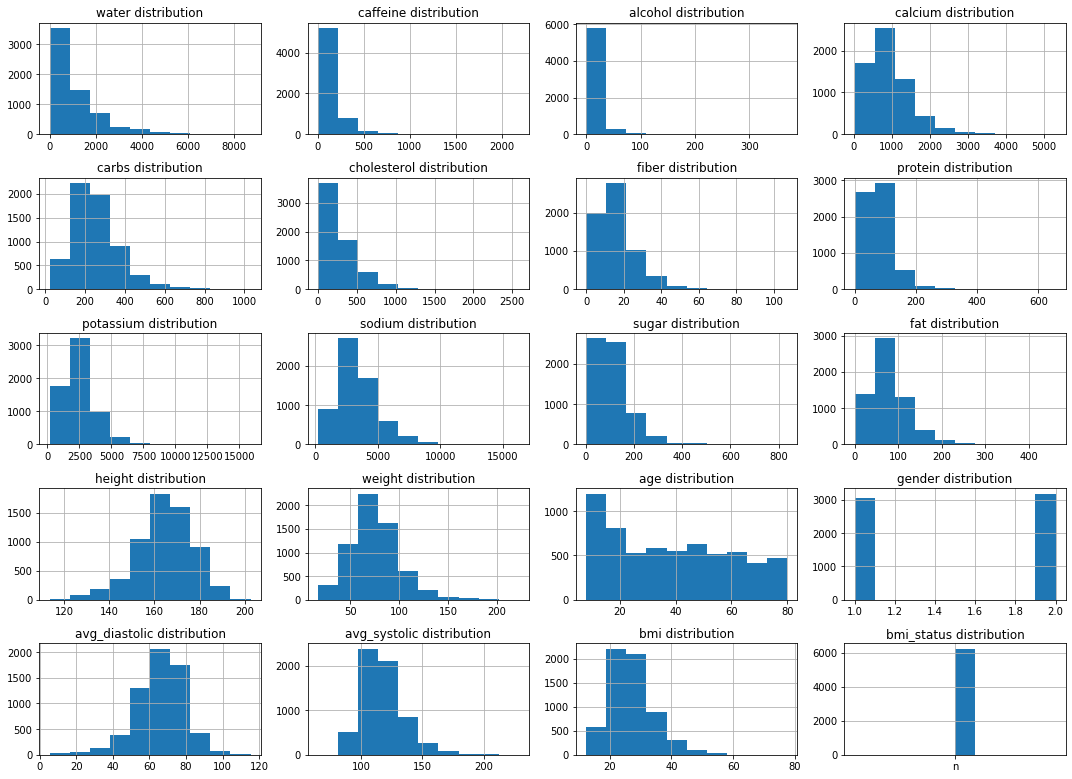

In [50]:
# Plot histogram for each column in data frame
draw_histograms(df, df.columns, 7, 4)

From our distribution plots, we can immediately see that many features are skewed especially regarding the diet related variables. Due to the skew data, this further solidifies our reasoning for not imputing missing values with the mean as it wouldn't be representative. From an immediate glance we notice that practically all diet variables are right skewed. Beyond the dietary variables, the blood pressure readings are closer to a normal distribution. However, through a closer look, the average diastolic is slightly skewed to the left while the average systolic is slightly skewed to the right. If we compare the axes, systolic is larger than diastolic, which is fine because in blood pressure readings systolic is typically the higher number (the top number) and diastolic is typically the lower number (the bottom number). In addition, we can see that the height and weight distributions are relatively normal as well with slight skews similar to our diastolic and systolic. Height is slightly skewed to the left and weight is slightly skewed to the right, which is appropriate as there aren't many "short" people (under 4 feet). Regarding the more noticeable skew for weight, there could be many other factors such as muscle or simply height that could contribute to a higher weight beyond fat. 

[Back to Contents](#Contents:)
#### Heat Maps

In [51]:
# Defining a function to plot a heatmap correlation
def heatmap(bp):
    
    # Figure size
    plt.figure(figsize=(3, 10)) 
    
    # Plot
    sns.heatmap(df.corr()[[bp]].sort_values(bp, ascending = False), # Sort
                annot = True, # Annotate
                cmap = "Blues", # Color
                vmin = -1, # Minimum Boundary
                vmax = 1, # Maximum Boundary
                annot_kws = {'fontsize':16}) 
    
    # Size of x axis label
    plt.xticks(fontsize = 10) 
   
    # Size of y axis label
    plt.yticks(fontsize = 10);

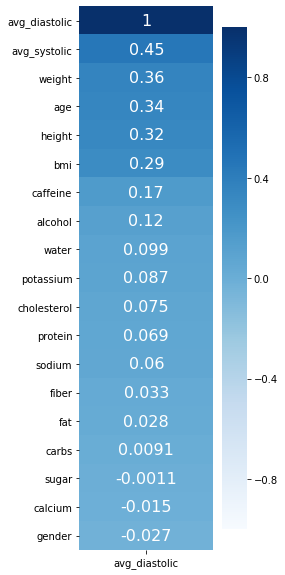

In [52]:
heatmap('avg_diastolic')

_Chart 1: Average Diastolic Correlations_

Surprisingly, there are some negative correlations with the diastolic readings. Apparently, sugar, calcium, and gender play a role that an increase in these factors yields a decreases in diastolic pressure. Liquids also contribute a strong correlation with average diastolic readings than solids where caffeine is the highest, but expected as it causes a spike in blood pressure. On the other hand, cholesterol's correlation falls somewhere in the middle and quite close to zero. 

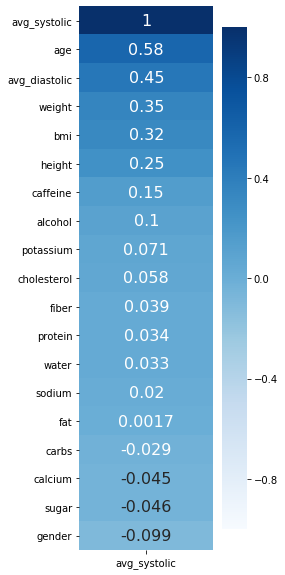

In [53]:
heatmap('avg_systolic')

_Chart 2: Average Systolic Correlations_

Compared to the diastolic correlations, age moved up a rank and proved to be more correlated to average systolic readings than the complement blood pressure reading. However, the rankings of correlation still fall in the same slots as the diastolic correlations, but with different strengths. Diet seems to affect the average systolic readings more than the average diastolic readings. 

[Back to Contents](#Contents:)
#### Pair Plots

In [54]:
# Defining a function that will return pairplots showing the relationship between y input and diet variables
def pairplots(data, y): 
    plots = sns.pairplot(data, x_vars = diet_cols, y_vars = y, kind = 'reg', height = 5)
    return plots

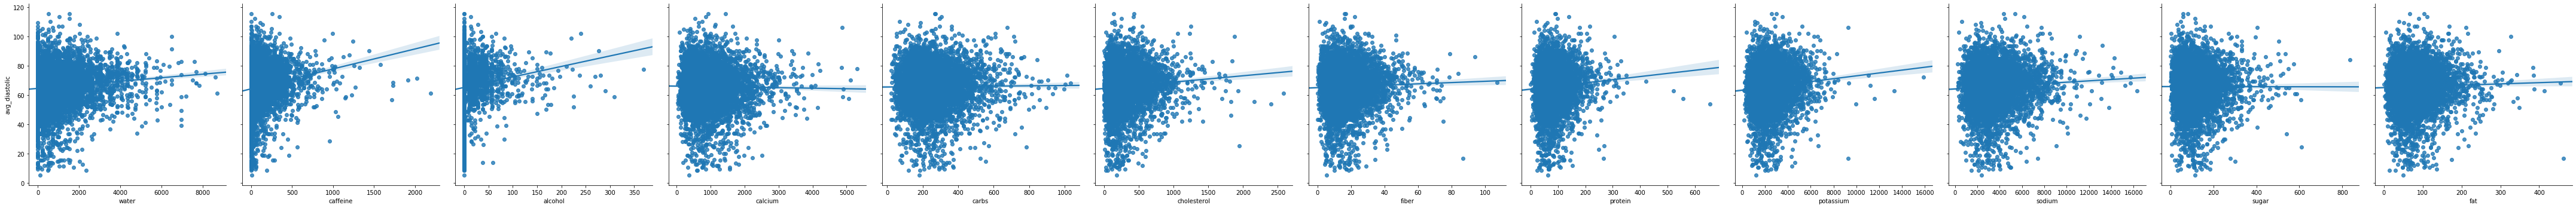

In [55]:
# Dataset with y = average diastolic readings
pairplots(df, 'avg_diastolic');

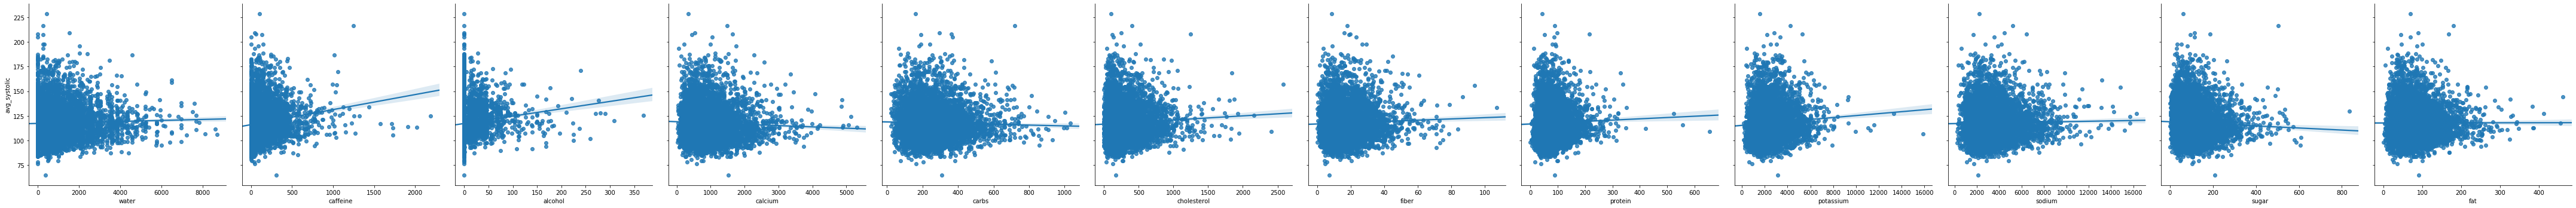

In [56]:
# Dataset with y = average systolic readings
pairplots(df, 'avg_systolic');

From analyzing the each individual pair plot, there aren't very strong linear correlations. Majority of the points fall within a specific range as opposed to having a linear relationship. However, there are some nutrients that show somewhat more of a linear relationship than others such as water, carbohydrates, and sodium which are delved into further below. 

[Back to Contents](#Contents:)
#### Diastolic Scatter Plots
After analyzing the pairplots, we take a closer look at the standout graphs from our intial analysis, which are water, carbohydrates, cholesterol, and sodium. 

In [57]:
# Defining a function to plot correlation charts
def scatterplot(x, y): 
    plt.figure(figsize = (7, 5))
    plt.title(f'{x} and {y}', fontsize = 15)
    sns.regplot(df[x], df[y]);

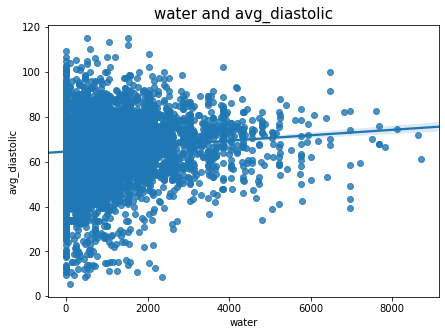

In [58]:
scatterplot('water', 'avg_diastolic')

_Chart 3: Water and Average Diastolic Reading Relationship_

We can see a heavy concentration of our points in the 40-60 range for diastolic pressure and in the 0-2000 range for water intake. However, we can see that there is a slight trend where can depict a regression line that shows as more water is consumed, the diastolic pressure seems to increase ever so slightly. 

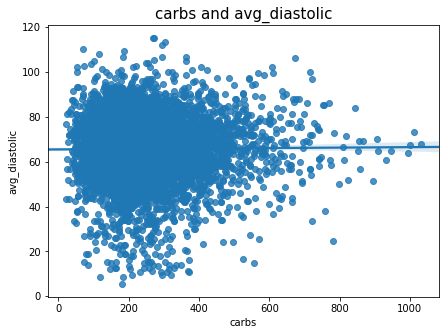

In [59]:
scatterplot('carbs', 'avg_diastolic')

_Chart 4: Carbohydrates and Average Diastolic Reading Relationship_

Similar to Chart 3 as well as the other pair plot, there is a heavy concentration in the left middle part of the graph, which is normal as it shows that the average intake of carbohydrates yields a normal range for diastolic pressure. However, similar to Chart 3, we can see a much more slightly correlated relationship where an increase in carbohydrate consumption yields an increase in diastolic reading. 

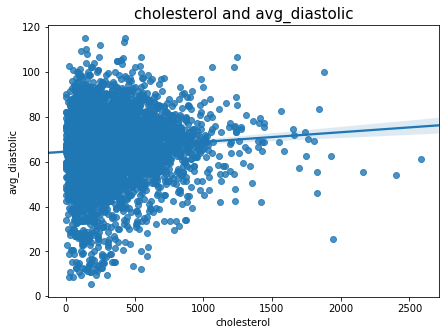

In [60]:
scatterplot('cholesterol', 'avg_diastolic')

_Chart 5: Cholesterol and Average Diastolic Reading Relationship_

Given how many individuals associate cholesterol with blood pressure, it's surprising to see how there isn't a strong linear relationship between the two. Similarly to all the other graphs, there is a concentration with a very menial spread. 

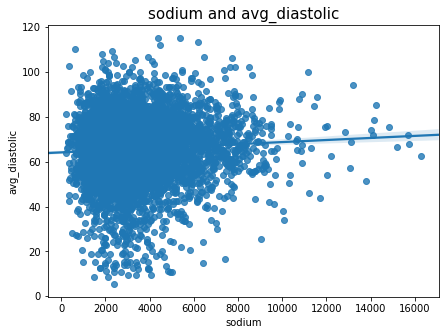

In [61]:
scatterplot('sodium', 'avg_diastolic')

_Chart 6: Sodium and Average Diastolic Reading Relationship_

While similar to all other graphs regarding the concentration of points, the range of these points is more spread out when looking at the diastolic readings. The sodium intake, for example, of 2,000 milligrams can yield a diastolic reading from 0 to 100 (which can slightly be seen in Chart 5). 

[Back to Contents](#Contents:)
#### Systolic Scatter Plots
After analyzing the pairplots, we take a closer look at the standout graphs from our intial analysis which are water, carbohydrates, sodium, and age (from the heatmap). 

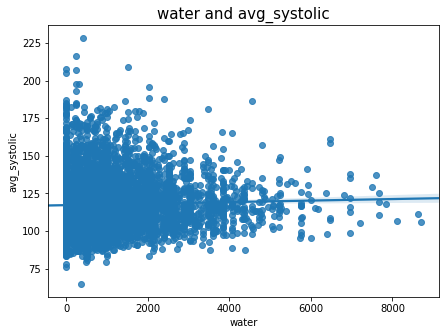

In [62]:
scatterplot('water', 'avg_systolic')

_Chart 7: Water and Average Systolic Reading Relationship_

Unlike the diastolic readings, the average systolic readings have a strong correlation with water. There is a more apparent linear relationship to the point where we can see a start of funnel. 

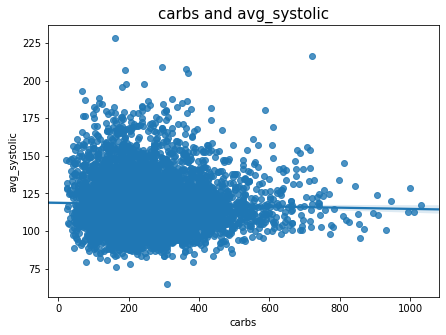

In [63]:
scatterplot('carbs', 'avg_systolic')

_Chart 8: Carbohydrates and Average Systolic Reading Relationship_

Similar to Chart 7, we can see more of a funneling linear-like relationship with a few outliers that weren't as apparent in our outlier analysis. However, similarly to the diastolic relationships, there still remains a concentration of average intake and average systolic readings. 

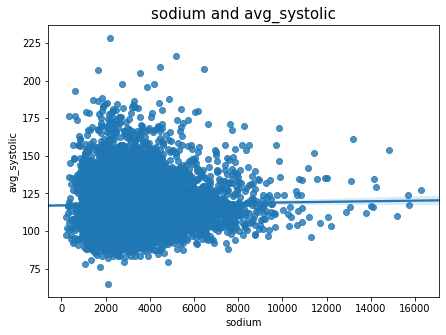

In [64]:
scatterplot('sodium', 'avg_systolic')

_Chart 9: Sodium and Average Systolic Reading Relationship_

Interestingly, this relationship shows more a of ball-like relationship unlike the other graphs. So it's difficult to say how sodium affects blood pressure as the diastolic readings showed more of a spread, but the systolic shows the opposite. 

[Back to Contents](#Contents:)
#### Non-Diet Scatter Plots
After exploring the nutrition relationships, we take a closer look to see how our data is with the non-diet variables as they prove to have a higher correlation as seen from our heatmap.

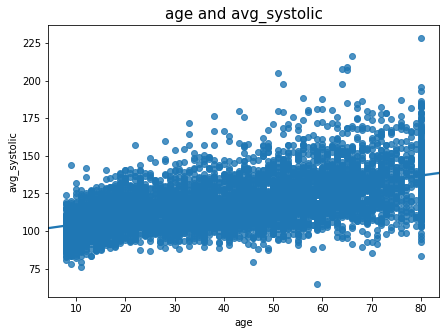

In [65]:
scatterplot('age', 'avg_systolic')

_Chart 10: Age and Average Systolic Reading Relationship_

Based on the heatmap correlations, we decided to take a closer look at the relationship with age and unlike any of the diet relationships, age has a somewhat strong linear relationship with systolic readings. There isn't any bunching or clustering of points. Instead, there is a clear positive trend (minus some points) where as age increases so does systolic pressure

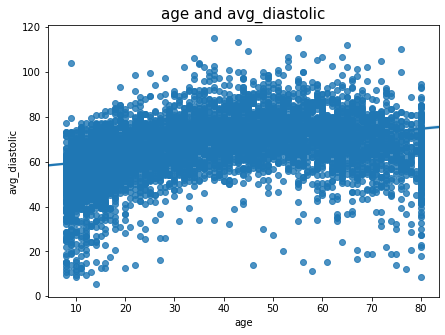

In [66]:
scatterplot('age', 'avg_diastolic')

_Chart 11: Age and Average Diastolic Reading Relationship_

While there is a transition, it isn't similar to Chart 10 as the points form more of a curve as opposed to a line. Furthermore, the diastolic readings tend to be more spread out compared to the systolic readings. 

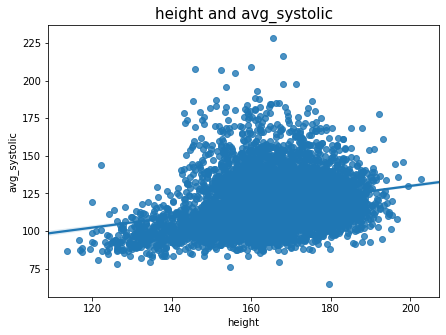

In [67]:
scatterplot('height', 'avg_systolic')

_Chart 12: Height and Average Systolic Reading Relationship_

There does seem to be a slight linear relationship with more of a concentration circle around the average height. 

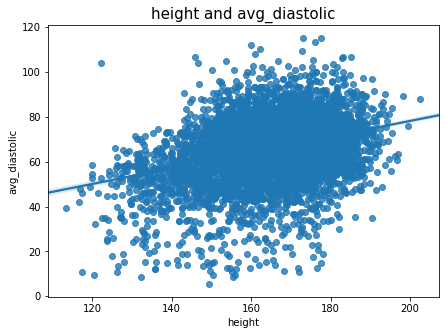

In [68]:
scatterplot('height', 'avg_diastolic')

_Chart 13: Height and Average Diastolic Reading Relationship_

Unlike the systolic relationship, the diastolic pressures are more spread out, but we can still see the concentrated circle in the average height range (160cm to 180cm). 

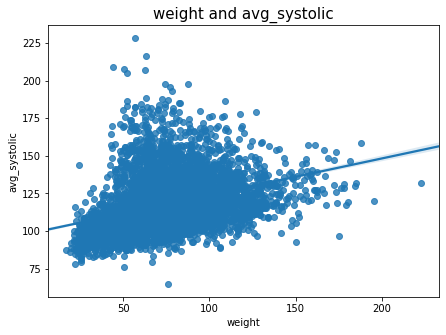

In [69]:
scatterplot('weight', 'avg_systolic')

_Chart 14: Weight and Average Systolic Reading Relationship_

With the weight factor, the plot resembles more of the diet relationships where there is a stronger correlation in the beginning and not much of a linear relationship, which is interesting because according to the heatmap, weight still has a higher correlation than any of the diet factors. 

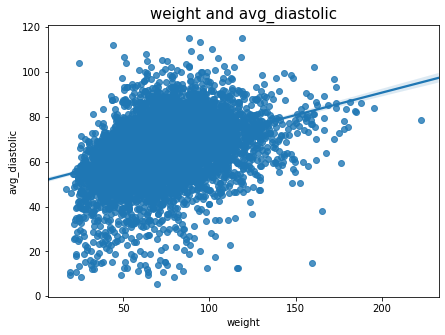

In [70]:
scatterplot('weight', 'avg_diastolic')

_Chart 15: Weight and Average Diastolic Reading Relationship_

Similar to the other charts, the weight points are more spread out, but still resemble a similar concentration as seen in the systolic relationship. 

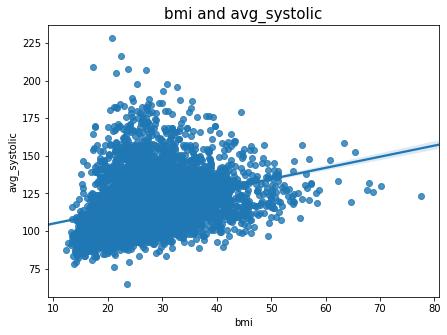

In [71]:
scatterplot('bmi', 'avg_systolic')

_Chart 16: BMI and Average Systolic Reading Relationship_

Like the weight relationship, BMI also shows a resemblance to the diet relationships where there is more of a cluster as opposed to a positive line trend.

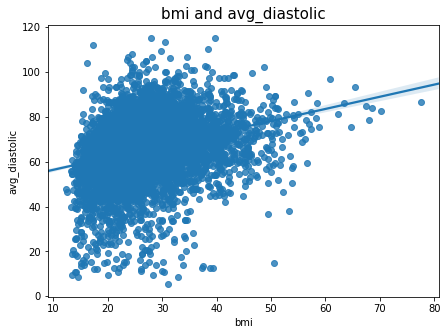

In [72]:
scatterplot('bmi', 'avg_diastolic')

_Chart 17: BMI and Average Diastolic Reading Relationship_

Unlike Chart 16, BMI and diastolic pressure seem to have the reverse relationship where the points almost mirror the one above. However, it still displays the similar clustering and non-linear trend. 

## Preprocessing 
After cleaning and examining our data set, we can dive into creating our `x` and `y` variables for modeling. Since we are predicting blood pressure and blood pressure is comprised of two readings (diastolic and systolic), we are going to have two `y` variables and essentially run everything twice as we need to predict for each reading that makes up blood pressure. 

[Back to Contents](#Contents:)

In [73]:
# Establish columns to be considered modeling a prediction for diastolic and systolic readings
features = ['water', 'caffeine', 'alcohol', 'calcium', 'carbs', 'cholesterol',
            'fiber', 'protein', 'potassium', 'sodium', 'sugar', 'fat', 'height', 
            'weight', 'age', 'gender', 'bmi']

# Create one x, but two y variables - one for diastolic and one for systolic
X = df[features]
y_diastolic = df['avg_diastolic']
y_systolic = df['avg_systolic']

In [74]:
# Train-Test-Split for each part of a blood pressure reading
X_train, X_test, y_train_d, y_test_d = train_test_split(X, y_diastolic, 
                                                        test_size = 0.33, random_state = 42, 
                                                        shuffle = False)

X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_systolic, 
                                                        test_size = 0.33, random_state = 42, 
                                                        shuffle = False)

In [75]:
# Scaling our data
ss = StandardScaler()
Z_train = ss.fit_transform(X_train)
Z_test = ss.transform(X_test)

Ultimately, we have 6 different variables from our `train-test-split` but we set the `shuffle` parameter to `False` as we need the `X_train` and `X_test` to be referring to the same rows when predicting diastolic and systolic readings. Afterwards, we need to scale our `X_train` and `X_test` to normalize the data. 
## Regression Modeling 
After creating our training and testing variables, we begin the modeling process by establishing our baseline regression models, which are our mean values for the diastolic and systolic columns. We have two metrics to consider - $R^2$ and Root Mean Squared Error - to help us determine how well our model is doing. 

[Back to Contents](#Contents:)

In [76]:
y_avg_d = y_diastolic.mean()
diastolic_baseline_preds = [y_avg_d for i in y_diastolic]

# Baseline Score
r2_score(y_diastolic, diastolic_baseline_preds)

0.0

In [77]:
y_avg_s = y_systolic.mean()
systolic_baseline_preds = [y_avg_s for i in y_systolic]

# Baseline Score
r2_score(y_systolic, systolic_baseline_preds)

-2.220446049250313e-16

In [78]:
# Alternative Baseline Score - RMSE
np.sqrt(mean_squared_error(y_diastolic, diastolic_baseline_preds))

13.679220044935967

In [79]:
# Alternative Baseline Score - RMSE
np.sqrt(mean_squared_error(y_systolic, systolic_baseline_preds))

17.156986011333064

With our baseline scores, we see that the $R^2$ scores are zero since we are setting the explained variance and total variance equal to one another hence no variance. On the other hand, we can see from the RMSE scores the average distance between the actual values and the predicited values - in this case our mean values.

In [80]:
# Defining a function to output metrics for model analysis for diastolic predictions
def diastolic_metrics(model): 
    # R^2 Score of Training Set
    print(f'R^2 Score of Training Set: {model.score(Z_train, y_train_d)}')
    
    # R^2 Score of Testing Set
    print(f'R^2 Score of Testing Set: {model.score(Z_test, y_test_d)}')
    
    # RMSE Score of Training Set
    print(f'RMSE Score of Training Set: {np.sqrt(mean_squared_error(y_train_d, y_train_d_preds))}')
    
    # RMSE Score of Testing Set
    print(f'RMSE Score of Testing Set: {np.sqrt(mean_squared_error(y_test_d, y_test_d_preds))}')

In [81]:
# Defining a function to output metrics for model analysis for diastolic predictions
def systolic_metrics(model): 
    # R^2 Score of Training Set
    print(f'R^2 Score of Training Set: {model.score(Z_train, y_train_s)}')
    
    # R^2 Score of Testing Set
    print(f'R^2 Score of Testing Set: {model.score(Z_test, y_test_s)}')
    
    # RMSE Score of Training Set
    print(f'RMSE Score of Training Set: {np.sqrt(mean_squared_error(y_train_s, y_train_s_preds))}')
    
    # RMSE Score of Testing Set
    print(f'RMSE Score of Testing Set: {np.sqrt(mean_squared_error(y_test_s, y_test_s_preds))}')

### Linear Regressors
After establishing our baseline scores, we explore various regression models to hopefully increases optimize our metrics: try to get $R^2$ to as close to 100% and try to get RMSE to as close to 0 without overfitting or underfitting the model. First we start with linear regressors: a linear approach to modeling the relationship between a our scalar responses and  explanatory variables. We are exploring four types of linear regression: the basic approach as well as three other types of regularization - Lasso, Ridge, and Elastic Net. 

[Back to Contents](#Contents:)
#### *Diastolic Linear Regression*

In [82]:
# Instantiate the model
lr = LinearRegression()

# Fit the model with our training data
lr.fit(Z_train, y_train_d)

# Predict our y values 
y_train_d_preds = lr.predict(Z_train)
y_test_d_preds = lr.predict(Z_test)

#### Metrics Analysis

In [83]:
diastolic_metrics(lr)

R^2 Score of Training Set: 0.20928005091822133
R^2 Score of Testing Set: 0.21891089472394964
RMSE Score of Training Set: 11.956481170035085
RMSE Score of Testing Set: 12.493386474844064


From the $R^2$ scores, our model performs extremely poor where only 20.93% of the variance can be explained by the model regarding the training set and only 21.89% of the variance for the testing set. Looking at the RMSE, the model does perform better than the baseline model; however our model is underfit and doesn't do well in predicting an accurate diastolic reading. 

[Back to Contents](#Contents:)
#### *Systolic Linear Regression*

In [84]:
# Instantiate the model
lr = LinearRegression()

# Fit the model with our training data
lr.fit(Z_train, y_train_s)

# Predict our y values 
y_train_s_preds = lr.predict(Z_train)
y_test_s_preds = lr.predict(Z_test)

#### Metrics Analysis

In [85]:
systolic_metrics(lr)

R^2 Score of Training Set: 0.3849171047174438
R^2 Score of Testing Set: 0.36022211817558536
RMSE Score of Training Set: 13.395524097536663
RMSE Score of Testing Set: 13.8395407716832


While our model does do better with the systolic readings, there is still a significant amount of room for improvement as it only can explain 38.49% of variance for the training set and 36.02% for the testing set. On the other hand, our RMSE score didn't do as well as our $R^2$ score, as the margin of error has increased slightly, but has shown a very similar error across both the training and testing data sets and still does better than our baseline. 

[Back to Contents](#Contents:)
#### *Diastolic Lasso Regression*

In [86]:
# Instantiate the model
lasso = LassoCV(cv = 5)

# Fit the model with our training data
lasso.fit(Z_train, y_train_d)

# Predict our y values 
y_train_d_preds = lasso.predict(Z_train)
y_test_d_preds = lasso.predict(Z_test)

#### Metrics Analysis

In [87]:
diastolic_metrics(lasso)

R^2 Score of Training Set: 0.2089464920979941
R^2 Score of Testing Set: 0.2180352928682281
RMSE Score of Training Set: 11.959002776610246
RMSE Score of Testing Set: 12.500387064342508


From the $R^2$ scores, this model performs even worse compared to our Linear Regression model where only 20.03% of the variance can be explained by the model regarding the training set and only 21.36% of the variance for the testing set. Looking at the RMSE, the model does perform better than the baseline model; however this model does worse than our Linear Regression model similarly to our analysis from the $R^2$ scores.

[Back to Contents](#Contents:)
#### *Systolic Lasso Regression*

In [88]:
# Instantiate the model
lasso = LassoCV(cv = 5)

# Fit the model with our training data
lasso.fit(Z_train, y_train_s)

# Predict our y values 
y_train_s_preds = lasso.predict(Z_train)
y_test_s_preds = lasso.predict(Z_test)

#### Metrics Analysis

In [89]:
systolic_metrics(lasso)

R^2 Score of Training Set: 0.3831736509902244
R^2 Score of Testing Set: 0.3601214738977805
RMSE Score of Training Set: 13.414495483694951
RMSE Score of Testing Set: 13.840629286815899


While our model does do better with the systolic readings, this model does slightly worse as it only can explain 37.97% of variance for the training set and 35.38% for the testing set. Our RMSE score shows a lack of improvement, as the margin of error has increased slightly, but still has shown a very similar error across both the training and testing data sets and still does better than our baseline. As a result, the Lasso regularization of shrinkage isn't ideal for our data set. 

[Back to Contents](#Contents:)
#### *Diastolic Ridge Regression*

In [90]:
# Instantiate the model
ridge = RidgeCV(cv = 5)

# Fit the model with our training data
ridge.fit(Z_train, y_train_d)

# Predict our y values 
y_train_d_preds = ridge.predict(Z_train)
y_test_d_preds = ridge.predict(Z_test)

#### Metrics Analysis

In [91]:
diastolic_metrics(ridge)

R^2 Score of Training Set: 0.20925032433681648
R^2 Score of Testing Set: 0.2189012162875419
RMSE Score of Training Set: 11.956705915832126
RMSE Score of Testing Set: 12.493463877070733


From the $R^2$ scores, this model performs as well as our Linear Regression model where 20.93% of the variance can be explained by the model regarding the training set and only 21.89% of the variance for the testing set. Looking at the RMSE, the model does perform better than the baseline model; but as we saw from our $R^2$ scores, the RMSE scores are identical to our Linear Regression model too. 

[Back to Contents](#Contents:)
#### *Systolic Ridge Regression*

In [92]:
# Instantiate the model
ridge = RidgeCV(cv = 5)

# Fit the model with our training data
ridge.fit(Z_train, y_train_s)

# Predict our y values 
y_train_s_preds = ridge.predict(Z_train)
y_test_s_preds = ridge.predict(Z_test)

#### Metrics Analysis

In [93]:
systolic_metrics(ridge)

R^2 Score of Training Set: 0.38489174797527437
R^2 Score of Testing Set: 0.36025348459850937
RMSE Score of Training Set: 13.395800209384966
RMSE Score of Testing Set: 13.839201511588406


While our model does do better with the systolic readings, similarly to the Linear Regression model, there is still a significant amount of room for improvement as it only can explain 38.49% of variance for the training set and 36.02% for the testing set. Similarly to our Linear Regression model, this model yields the same results, which tells us that our data set doesn't suffer from multicollinearity so this type of regularization has little to no effect on better our model predictions. 

[Back to Contents](#Contents:)
#### *Diastolic Elastic Net Regression*

In [94]:
# Instantiate the model
elastic_net = ElasticNetCV(cv = 5)

# Fit the model with our training data
elastic_net.fit(Z_train, y_train_d)

# Predict our y values 
y_train_d_preds = elastic_net.predict(Z_train)
y_test_d_preds = elastic_net.predict(Z_test)

#### Metrics Analysis

In [95]:
diastolic_metrics(elastic_net)

R^2 Score of Training Set: 0.20846114351519374
R^2 Score of Testing Set: 0.21751963615475434
RMSE Score of Training Set: 11.962670919766062
RMSE Score of Testing Set: 12.504507995974105


From the $R^2$ scores, this model performs slightly worse than our Linear Regression and Ridge models where 20.21% of the variance can be explained by the model regarding the training set and only 21.51% of the variance for the testing set. Looking at the RMSE, the model does perform better than the baseline model; however this model has a slightly farther distance between predicted and actual values compared to the Linear Regression and Ridge models. 

[Back to Contents](#Contents:)
#### *Systolic Elastic Net Regression*

In [96]:
# Instantiate the model
elastic_net = ElasticNetCV(cv = 5)

# Fit the model with our training data
elastic_net.fit(Z_train, y_train_s)

# Predict our y values 
y_train_s_preds = elastic_net.predict(Z_train)
y_test_s_preds = elastic_net.predict(Z_test)

#### Metrics Analysis

In [97]:
systolic_metrics(elastic_net)

R^2 Score of Training Set: 0.38453789508496705
R^2 Score of Testing Set: 0.36043902882365375
RMSE Score of Training Set: 13.399652751671512
RMSE Score of Testing Set: 13.837194490003764


While our model does do better with the systolic readings, it doesn't perform as well as the Linear Regression and Ridge models as it only can explain 37.98% of variance for the training set and 35.39% for the testing set. While we had expected the Elastic Net to perform the best as it combines the Lasso and Ridge regularization, since both forms of regularization proved to be ineffective, we didn't end up with a better model. However, we did manage to close the gap between or training and testing data sets (score wise) with this model. 
### Tree Regressors
Overall, there are limitations to the linear regressors as there isn't necessarily a linear relationship concerning our data set especially when our diastolic and systolic readings fall between a certain range as opposed to an unbounded positive range. This leads us to explore a different type of regressor which may be able to help combat nonlinear relationships: tree regressors - specifically Decision Tree, Bagged Decision Tree, and Random Forest. 

[Back to Contents](#Contents:)

#### *Diastolic Decision Tree*

In [98]:
# Instantiate the model
dt = DecisionTreeRegressor(random_state = 42)

# Fit the model with our training data
dt.fit(Z_train, y_train_d)

# Predict our y values 
y_train_d_preds = dt.predict(Z_train)
y_test_d_preds = dt.predict(Z_test)

#### Metrics Analysis

In [99]:
diastolic_metrics(dt)

R^2 Score of Training Set: 1.0
R^2 Score of Testing Set: -0.33893808596538033
RMSE Score of Training Set: 0.0
RMSE Score of Testing Set: 16.357244007611666


We can see that our model is severely overfit based on our metric scores. The training data outputted perfect scores, while the testing data showed completely opposite scores. The $R^2$ score is negative so our testing data doesn't follow the trend that the model was trained on so it ended up fitting worse than a horizontal line. Our RMSE score is even worse than our baseline score. 

[Back to Contents](#Contents:)
#### *Systolic Decision Tree*

In [100]:
# Instantiate the model
dt = DecisionTreeRegressor(random_state = 42)

# Fit the model with our training data
dt.fit(Z_train, y_train_s)

# Predict our y values 
y_train_s_preds = dt.predict(Z_train)
y_test_s_preds = dt.predict(Z_test)

#### Metrics Analysis

In [101]:
systolic_metrics(dt)

R^2 Score of Training Set: 1.0
R^2 Score of Testing Set: -0.2932662035077518
RMSE Score of Training Set: 0.0
RMSE Score of Testing Set: 19.67664420840221


Looking at the model for systolic blood pressure, it perfoms equally as bad. The model is severely overfit with perfect training set scores and awful testing set scores, which are worse than our baseline scores. 

[Back to Contents](#Contents:)
#### *Diastolic Bagged Decision Tree*

In [102]:
# Instantiate the model
bag = BaggingRegressor(random_state = 42)

# Fit the model with our training data
bag.fit(Z_train, y_train_d)

# Predict our y values 
y_train_d_preds = bag.predict(Z_train)
y_test_d_preds = bag.predict(Z_test)

#### Metrics Analysis

In [103]:
diastolic_metrics(bag)

R^2 Score of Training Set: 0.8570127990586716
R^2 Score of Testing Set: 0.2118993568404579
RMSE Score of Training Set: 5.084410637657043
RMSE Score of Testing Set: 12.549335371250566


This model does significantly better than our Decision Tree model. While it is still overfit, it isn't as overfit as the model is able to predict some systolic readings accurately. From the $R^2$ scores, 85.7% of the variance can be explained by the model regarding the training set and only 21.19% of the variance for the testing set. From the RMSE scores, our training set does significantly better than our baseline, but only slightly better with our testing set. 

[Back to Contents](#Contents:)
#### *Systolic Bagged Decision Tree*

In [104]:
# Instantiate the model
bag = BaggingRegressor(random_state = 42)

# Fit the model with our training data
bag.fit(Z_train, y_train_s)

# Predict our y values 
y_train_s_preds = bag.predict(Z_train)
y_test_s_preds = bag.predict(Z_test)

#### Metrics Analysis

In [105]:
systolic_metrics(bag)

R^2 Score of Training Set: 0.8788710907932676
R^2 Score of Testing Set: 0.32229772160798487
RMSE Score of Training Set: 5.944519939619862
RMSE Score of Testing Set: 14.24382211913589


Similarly to the diastolic version of this model, it is still overfit, but does still outperforms our baseline model based on the RMSE scores. From the $R^2$ scores, 87.89% of the variance can be explained by the model regarding the training set and only 32.23% of the variance for the testing set.

[Back to Contents](#Contents:)
#### *Diastolic Random Forest*

In [106]:
# Instantiate the model
rf = RandomForestRegressor(random_state = 42)

# Fit the model with our training data
rf.fit(Z_train, y_train_d)

# Predict our y values 
y_train_d_preds = rf.predict(Z_train)
y_test_d_preds = rf.predict(Z_test)

#### Metrics Analysis

In [107]:
diastolic_metrics(rf)

R^2 Score of Training Set: 0.85557222488323
R^2 Score of Testing Set: 0.20912655912991485
RMSE Score of Training Set: 5.1099587801969655
RMSE Score of Testing Set: 12.571392335540693


Looking at the metrics for the Random Forest model, the results are very similar to the Bagged Decision Tree model. From the $R^2$ scores, 85.56% of the variance can be explained by the model regarding the training set and only 20.91% of the variance for the testing set. From the RMSE scores, our training set does significantly better than our baseline, but only slightly better with our testing set. As a result, we still have an overfit model. 

[Back to Contents](#Contents:)
#### *Systolic Random Forest*

In [108]:
# Instantiate the model
rf = RandomForestRegressor(random_state = 42)

# Fit the model with our training data
rf.fit(Z_train, y_train_s)

# Predict our y values 
y_train_s_preds = rf.predict(Z_train)
y_test_s_preds = rf.predict(Z_test)

#### Metrics Analysis

In [109]:
systolic_metrics(rf)

R^2 Score of Training Set: 0.8794500391991485
R^2 Score of Testing Set: 0.3144736732262825
RMSE Score of Training Set: 5.9302966936596775
RMSE Score of Testing Set: 14.325808372643959


Similarly, the systolic version produces similar results to the systolic version from the Bagged Decision Tree model. While still overfit the $R^2$ scores show that 87.95% of the variance can be explained by the model regarding the training set and only 31.45% of the variance for the testing set. From the RMSE scores, our training set does significantly better than our baseline, but only slightly better with our testing set. 

### Boosters 
While we saw little improvement with the tree regressors, we can tackle our overfitting situation through boosting models, which will take "weak learners" and turn them into "strong learners" by putting more weight on difficult to classify instances and less on those already handled well. In our case, we will be utilizing the Adaptive Boost and the Gradient Boost. 

[Back to Contents](#Contents:)
#### *Diastolic Adaptive Boost*

In [110]:
# Instantiate the model
ada = AdaBoostRegressor(random_state = 42)

# Fit the model with our training data
ada.fit(Z_train, y_train_d)

# Predict our y values 
y_train_d_preds = ada.predict(Z_train)
y_test_d_preds = ada.predict(Z_test)

#### Metrics Analysis

In [111]:
diastolic_metrics(ada)

R^2 Score of Training Set: 0.22061746586384876
R^2 Score of Testing Set: 0.20001363789954807
RMSE Score of Training Set: 11.870455134164027
RMSE Score of Testing Set: 12.64361247626618


From our metrics, we can see that the AdaBoost model performs similarly to our Linear Regression and Ridge model where there isn't significant bias like other models, but from the $R^2$ scores, only 22.06% of the variance can be explained by the model regarding the training set and only 20% of the variance for the testing set, which isn't great. However, from the RMSE scores it still proves to be better than our baseline at least. 

[Back to Contents](#Contents:)
#### *Systolic Adaptive Boost*

In [112]:
# Instantiate the model
ada = AdaBoostRegressor(random_state = 42)

# Fit the model with our training data
ada.fit(Z_train, y_train_s)

# Predict our y values 
y_train_s_preds = ada.predict(Z_train)
y_test_s_preds = ada.predict(Z_test)

#### Metrics Analysis

In [113]:
systolic_metrics(ada)

R^2 Score of Training Set: 0.32909713116694983
R^2 Score of Testing Set: 0.24525340145456842
RMSE Score of Training Set: 13.990160904634767
RMSE Score of Testing Set: 15.03168446632616


Similarly, the systolic version produces metrics like to our Linear Regression and Ridge model where there isn't significant bias like other models, but from the $R^2$ scores, only 32.91% of the variance can be explained by the model regarding the training set and only 24.53% of the variance for the testing set, which isn't great. However, from the RMSE scores it still proves to be better than our baseline at least. 

[Back to Contents](#Contents:)
#### *Diastolic Gradient Boost*

In [114]:
# Instantiate the model
gb = GradientBoostingRegressor(random_state = 42)

# Fit the model with our training data
gb.fit(Z_train, y_train_d)

# Predict our y values 
y_train_d_preds = gb.predict(Z_train)
y_test_d_preds = gb.predict(Z_test)

#### Metrics Analysis

In [115]:
diastolic_metrics(gb)

R^2 Score of Training Set: 0.4115219852831373
R^2 Score of Testing Set: 0.30125195985159015
RMSE Score of Training Set: 10.314713214703573
RMSE Score of Testing Set: 11.816536099244656


While the model is a bit overfit, this model has proven to yield our best results as we can see from the $R^2$ scores, 41.15% of the variance can be explained by the model regarding the training set and 30.13% of the variance for the testing set, which significantly better than our previous models. In addition, from the RMSE scores it also proves to be better than our baseline and other models. 

[Back to Contents](#Contents:)
#### *Systolic Gradient Boost*

In [116]:
# Instantiate the model
gb = GradientBoostingRegressor(random_state = 42)

# Fit the model with our training data
gb.fit(Z_train, y_train_s)

# Predict our y values 
y_train_s_preds = gb.predict(Z_train)
y_test_s_preds = gb.predict(Z_test)

#### Metrics Analysis

In [117]:
systolic_metrics(gb)

R^2 Score of Training Set: 0.5115177280941992
R^2 Score of Testing Set: 0.37680562338852663
RMSE Score of Training Set: 11.937607304911442
RMSE Score of Testing Set: 13.658997687562449


Similarly, while the model is more overfit than the diastolic version, this model has proven to yield our best results as we can see from the $R^2$ scores, 51.15% of the variance can be explained by the model regarding the training set and 37.68% of the variance for the testing set, which significantly better than our previous models. In addition, from the RMSE scores it also proves to be better than our baseline and other models. 

### GridSearch Voting Regressor 
After making a substantial amount of progress from our boosting models, we tackle, what is hopefully going to be our best model, where we construct a model that is comprised of some of our best previous models and fine tune some of the parameters. 

[Back to Contents](#Contents:)

In [118]:
# Instantiate the model
vote = VotingRegressor([
    ('lr', LinearRegression()),
    ('rf', RandomForestRegressor(random_state = 42)),
    ('bag', BaggingRegressor(random_state = 42)), 
    ('gb', GradientBoostingRegressor(random_state = 42))
])

# Establish Parameters
vote_params = {'rf__n_estimators': [100, 150],
               'rf__max_depth': [None, 4, 5],
               'rf__bootstrap': [True, False],
               'bag__n_estimators': [100, 200, 300],
               'gb__n_estimators': [100, 200, 300], 
               'gb__max_depth': [3, 4, 5]}

# Voting Regressor Grid Search
gs = GridSearchCV(vote, 
                  param_grid = vote_params, 
                  cv = 5)

#### *Diastolic Voting Regressor*

In [119]:
# Fit the model with our training data
gs.fit(Z_train, y_train_d)

# Predict our y values 
y_train_d_preds = gs.predict(Z_train)
y_test_d_preds = gs.predict(Z_test)

# Establishing our best model
best_model = gs.best_estimator_

#### Metrics Analysis 

In [120]:
diastolic_metrics(best_model)

R^2 Score of Training Set: 0.5297722674186938
R^2 Score of Testing Set: 0.3002321877611046
RMSE Score of Training Set: 9.220323436719406
RMSE Score of Testing Set: 11.825155644234243


Our model proves to do significantly better than our previous models. While it is overfit, it manages to produce similar outputs for the testing data set as the Gradient Boost model. Based on the $R^2$ scores, this model accounts for 52.98% of the variance of our training set and 30.02% of our testing set. In addition it does fairly well based on the RMSE scores as we limit the 
#### *Systolic Voting Regressor*
[Back to Contents](#Contents:)

In [ ]:
# Fit the model with our training data
gs.fit(Z_train, y_train_s)

# Predict our y values 
y_train_s_preds = gs.predict(Z_train)
y_test_s_preds = gs.predict(Z_test)

# Establishing our best model
best_model = gs.best_estimator_

#### Metrics Analysis

In [ ]:
systolic_metrics(best_model)

## Conclusion

Through our various models and based on our metrics, our best model turned out to be the Voting Regressor model. While the testing scores were very similar to the Gradient Boosting model, we determined the Voting Regressor to be our best choice as it is constructed with the Gradient Boost and other models as well. It was better fit on our training data and still managed to produce very similar results on our testing data. For our diastolic predictions, the Voting Regressor model had 52.98% of variance explained by the model for the training set, and 30.02% of variance explained by model based on the $R^2$ scores. In addition, the RMSE scores prove to be significantly better than our baseline and other models as well at 9.22 for our training set and 11.83 for our testing set. Furthermore, we can see from our systolic predictions that the Voting Regressor also performs the best. 

[Back to Contents](#Contents:)

## Recommendations 
There are quite a few limitations to our data set and models. Since we are using regression models, they tend to be unbounded so the factor of creating boundaries is one thing. In addition, given how it could be difficult to predict diastolic and systolic readings accurately based on one's nutritional daily intake, proved that a classification model could've been a better approach. There could've been a class column where we simply determine whether or not someone is in the normal range, the elevated range, the stage 1 hypertension range, etc. Another aspect could be gather more information and utilizing more features beyond diet. While the goal was to provide something that didn't require much health information, it may prove to be beneficial to have those records be a factor. For instance, whether someone was a smoker could've been a feature to include. Lastly, the aspect of quantity. While quality over quantity is the saying, quantity also plays a major role. After our cleaning, we ended up with a little over 6,000 rows from the original 10,000. In the future, just having more participants or pushing (not forcing) individuals to answer all questions would allow for data sets to be much more manageable. 

[Back to Contents](#Contents:)
### Classification Analysis
In terms of a classification approach, we would first need to create bins to create a new column to our data frame as to whether someone is normal or at risk and we gathered those ranges from [here](https://www.healthline.com/health/high-blood-pressure-hypertension/blood-pressure-reading-explained). Afterwards, we could analyze our count of each bin in order to tackle the classification model. 

In [ ]:
# Create bins for blood pressure readings
systolic = df['avg_systolic']
diastolic = df['avg_diastolic']

for i, j in enumerate(zip(systolic, diastolic)): 
    if j[0] < 120.0 and j[1] < 80.0: 
        df['bp_rating'] = 5
    elif j[0] >= 120.0 and j[0] < 130.0 and j[1] < 80.0:
        df['bp_rating'] = 4
    elif j[0] >= 130.0 and j[0] < 140.0 and j[1] >= 80.0 and j[1] < 90.0:
        df['bp_rating'] = 3
    elif j[0] >= 140.0 and j[0] < 180.0 and j[1] >= 90.0 and j[1] < 120.0:
        df['bp_rating'] = 2
    elif j[0] >= 180.0 or j[1] >= 120.0:
        df['bp_rating'] = 1

In [ ]:
# Check out the count of blood pressure ratings
df['bp_rating'].value_counts()

As shown from the cell block above, we can see that all our individuals yielded a normal blood pressure, which is great for them, but not so great for us regarding the classification approach as we only have one value instead of the minimum of two. However, if we were to have gathered more data where not all individuals had normal blood pressure, we would explore the classification method to possibly better predict a person's blood pressure status and risk for hypertension. 

[Back to Contents](#Contents:)
## Sources
- [Blood Pressure Matters](https://newsinhealth.nih.gov/2016/01/blood-pressure-matters)
- [Dietary Data](https://wwwn.cdc.gov/nchs/nhanes/Search/DataPage.aspx?Component=Dietary&CycleBeginYear=2013)
- [Dietary Variable List](https://wwwn.cdc.gov/Nchs/Nhanes/Search/variablelist.aspx?Component=Dietary&CycleBeginYear=2013)
- [Examination Data](https://wwwn.cdc.gov/Nchs/Nhanes/Search/DataPage.aspx?Component=Examination&CycleBeginYear=2013)
- [Examination Variable List](https://wwwn.cdc.gov/Nchs/Nhanes/Search/variablelist.aspx?Component=Examination&CycleBeginYear=2013)
- [Demographics Data](https://wwwn.cdc.gov/nchs/nhanes/Search/DataPage.aspx?Component=Demographics&CycleBeginYear=2013)
- [Demographics Variable List](https://wwwn.cdc.gov/nchs/nhanes/Search/variablelist.aspx?Component=Demographics&CycleBeginYear=2013)
- [NHANES Datasets](https://www.kaggle.com/cdc/national-health-and-nutrition-examination-survey#diet.csv)
- [BMI Calculation](https://www.cdc.gov/healthyweight/assessing/bmi/childrens_bmi/childrens_bmi_formula.html)
- [About BMI](https://www.nhs.uk/common-health-questions/lifestyle/what-is-the-body-mass-index-bmi/)
- [Child and Teen BMI Breakdown](https://www.researchgate.net/figure/Body-mass-index-mean-SD-and-percentiles-by-age-and-gender-among-the-study-population_tbl10_7616717)
- [Diastolic Zero Reading](https://www.quora.com/It-is-possible-to-have-a-diastolic-pressure-of-zero)
- [Diastolic and Systolic Reading Ranges](https://www.healthline.com/health/high-blood-pressure-hypertension/blood-pressure-reading-explained)